In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [ ]:
import pytorch_optimizer as optim

In [ ]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [ ]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [ ]:
len(y_train), len(y_test)

(50000, 10000)

In [ ]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [ ]:
X_train /= 255.
X_test /= 255.

In [ ]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

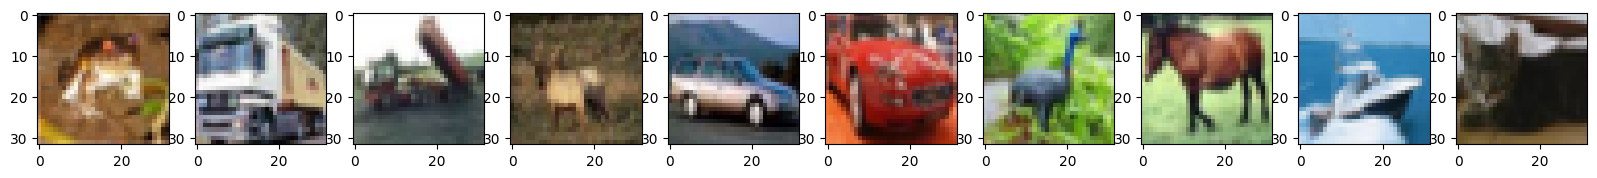

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [ ]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [ ]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [ ]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [ ]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(net.parameters(), lr=5.0e-2)
    #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-4)
    optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
    #optimizer = optim.YogiPNM(net.parameters())
    #optimizer = optim.AdaBelief(net.parameters())
    #optimizer = optim.DiffGrad(net.parameters())
    #optimizer = optim.Yogi(net.parameters())
    
    batch_size = 200

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(20):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))
        
        if epoch == 15:
            #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-5)
            #optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
            #optimizer = optim.YogiPNM(net.parameters())
            #optimizer = optim.AdaBelief(net.parameters())
            #optimizer = optim.DiffGrad(net.parameters())
            #optimizer = optim.Yogi(net.parameters())
    

        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")

    return test_accuracy_history, test_loss_history

In [ ]:
accuracies = {}
losses = {}

In [ ]:
from torchvision.models import vgg16, VGG16_Weights

In [ ]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+Adam'], losses['vgg16+Adam'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:50<00:00,  4.94it/s]


accuracy =  0.8079999685287476



epoch  1


100%|██████████| 250/250 [00:49<00:00,  5.08it/s]


accuracy =  0.8305999636650085



epoch  2


100%|██████████| 250/250 [00:49<00:00,  5.03it/s]


accuracy =  0.8563999533653259



epoch  3


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.8682999610900879



epoch  4


100%|██████████| 250/250 [00:49<00:00,  5.03it/s]


accuracy =  0.8567999601364136



epoch  5


100%|██████████| 250/250 [00:49<00:00,  5.03it/s]


accuracy =  0.8642999529838562



epoch  6


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.8693999648094177



epoch  7


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.8671999573707581



epoch  8


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.8666999936103821



epoch  9


100%|██████████| 250/250 [00:49<00:00,  5.03it/s]


accuracy =  0.8715999722480774



epoch  10


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.8732999563217163



epoch  11


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.870199978351593



epoch  12


100%|██████████| 250/250 [00:49<00:00,  5.05it/s]


accuracy =  0.8745999932289124



epoch  13


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.8657000064849854



epoch  14


100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


accuracy =  0.8732999563217163



epoch  15


100%|██████████| 250/250 [00:49<00:00,  5.05it/s]


accuracy =  0.8855999708175659



epoch  16


  8%|▊         | 20/250 [00:03<00:45,  5.03it/s]


KeyboardInterrupt: ignored

In [ ]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+PNMBelief'], losses['vgg16+PNMBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:59<00:00,  4.17it/s]


accuracy =  0.2662000060081482



epoch  1


100%|██████████| 250/250 [00:57<00:00,  4.33it/s]


accuracy =  0.30969998240470886



epoch  2


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.4875999987125397



epoch  3


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.649399995803833



epoch  4


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.7361999750137329



epoch  5


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.7935999631881714



epoch  6


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.8051999807357788



epoch  7


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.810699999332428



epoch  8


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.8297999501228333



epoch  9


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.8240999579429626



epoch  10


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.8501999974250793



epoch  11


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.8367999792098999



epoch  12


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.848800003528595



epoch  13


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.8467999696731567



epoch  14


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.8567000031471252



epoch  15


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.864799976348877



epoch  16


100%|██████████| 250/250 [00:48<00:00,  5.18it/s]


accuracy =  0.8660999536514282



epoch  17


100%|██████████| 250/250 [00:48<00:00,  5.18it/s]


accuracy =  0.8669999837875366



epoch  18


100%|██████████| 250/250 [00:48<00:00,  5.18it/s]


accuracy =  0.8675999641418457



epoch  19


100%|██████████| 250/250 [00:48<00:00,  5.17it/s]


accuracy =  0.8685999512672424





In [ ]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+Yogi'], losses['vgg16+Yogi'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:52<00:00,  4.79it/s]


accuracy =  0.7896999716758728



epoch  1


100%|██████████| 250/250 [00:51<00:00,  4.90it/s]


accuracy =  0.8458999991416931



epoch  2


100%|██████████| 250/250 [00:51<00:00,  4.86it/s]


accuracy =  0.8531000018119812



epoch  3


100%|██████████| 250/250 [00:51<00:00,  4.87it/s]


accuracy =  0.8629999756813049



epoch  4


100%|██████████| 250/250 [00:51<00:00,  4.87it/s]


accuracy =  0.8761000037193298



epoch  5


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.8636999726295471



epoch  6


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.8755999803543091



epoch  7


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.8569999933242798



epoch  8


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.8632999658584595



epoch  9


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.8738999962806702



epoch  10


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.8693999648094177



epoch  11


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.8700000047683716



epoch  12


100%|██████████| 250/250 [00:48<00:00,  5.13it/s]


accuracy =  0.8921999931335449



epoch  13


100%|██████████| 250/250 [00:48<00:00,  5.12it/s]


accuracy =  0.8949999809265137



epoch  14


100%|██████████| 250/250 [00:48<00:00,  5.12it/s]


accuracy =  0.8930999636650085



epoch  15


  6%|▌         | 15/250 [00:02<00:46,  5.09it/s]


KeyboardInterrupt: ignored

In [ ]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+DiffGrad'], losses['vgg16+DiffGrad'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:59<00:00,  4.20it/s]


accuracy =  0.652999997138977



epoch  1


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.8169999718666077



epoch  2


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.8443999886512756



epoch  3


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.8463000059127808



epoch  4


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.8449999690055847



epoch  5


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.857699990272522



epoch  6


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.8668999671936035



epoch  7


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.8598999977111816



epoch  8


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.868399977684021



epoch  9


100%|██████████| 250/250 [00:58<00:00,  4.27it/s]


accuracy =  0.8491999506950378



epoch  10


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.8529999852180481



epoch  11


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.8478999733924866



epoch  12


100%|██████████| 250/250 [00:48<00:00,  5.18it/s]


accuracy =  0.8869999647140503



epoch  13


100%|██████████| 250/250 [00:48<00:00,  5.17it/s]


accuracy =  0.8858000040054321



epoch  14


  6%|▌         | 14/250 [00:02<00:45,  5.14it/s]


KeyboardInterrupt: ignored

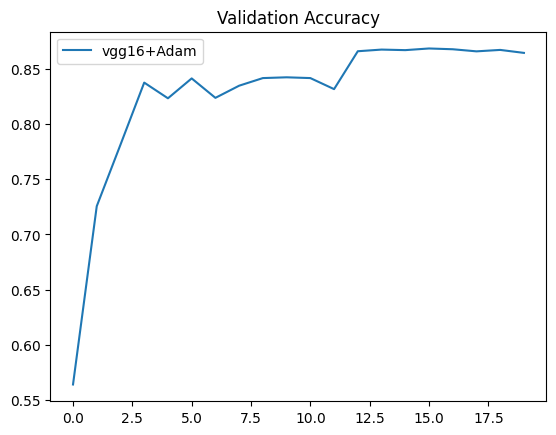

In [ ]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

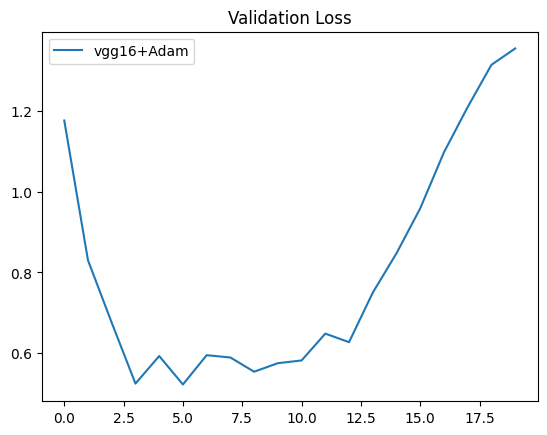

In [ ]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

In [ ]:
data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [ ]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [ ]:
D

In [ ]:
APreds = pd.DataFrame()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = []
model.eval()
with torch.no_grad():
            test_preds = model.forward(X_test)

In [ ]:
APreds['Adam'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['PNMBelief'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['Yogi'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['DiffGrad'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds

,Adam,PNMBelief,Yogi,DiffGrad
0,3,3,3,3
1,8,8,8,8
2,8,8,8,8
3,0,0,0,0
4,6,6,6,6
...,...,...,...,...
9995,3,3,3,0
9996,3,3,3,3
9997,5,5,5,5
9998,1,1,1,1


In [ ]:
APreds = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ansambl_vgg16_10.csv')

In [ ]:
APreds = APreds.drop(['Unnamed: 0'], axis=1)

In [ ]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/ansambl_vgg16_10.csv')

In [ ]:
APreds

,Adam,PNMBelief,Yogi,DiffGrad
0,3,3,3,3
1,8,8,8,8
2,8,1,8,8
3,0,0,0,0
4,6,6,6,6
...,...,...,...,...
9995,3,0,3,0
9996,3,3,3,3
9997,5,5,5,5
9998,1,1,1,1


In [ ]:
data = np.zeros((10000,10), dtype=int)
ARes = pd.DataFrame(data)

In [ ]:
for i in range(10000):
    for j in range(4):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.8856
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.8686
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.8931
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.8858

In [ ]:
anslist = ARes.idxmax(axis=1)

In [ ]:
accuracy = (torch.tensor(anslist).to(device) == y_test).float().mean().item()

In [ ]:
accuracy

0.9108999967575073